In [1]:
import time
import pandas as pd

In [2]:
# 타이머 기능
def print_time(end, start):
    print('='*50)
    elapsed = end - start
    print('{} secs'.format(round(elapsed)))

In [3]:
import pandas as pd
import numpy as np

trn = pd.read_csv('data/train_ver2.csv')

/home1/irteam/.pyenv/versions/3.6.4/envs/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
st = time.time()

# 데이터 읽어오기
trn = pd.read_csv('../data/train_ver2.csv')

print_time(time.time(),st)

In [ ]:
st = time.time()

# 변수명 확인
print(len(trn.columns))
print(list(trn.columns))

print_time(time.time(),st)

In [ ]:
trn.head()

In [ ]:
for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

In [ ]:
trn.info()

In [ ]:
trn['fecha_dato'].dtype

In [ ]:
trn['ind_recibo_ult1'].dtype

In [ ]:
trn['ind_nom_pens_ult1'].dtype

In [ ]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()

In [ ]:
num_cols

In [ ]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

In [ ]:
cat_cols

In [ ]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    # 출력에 너무 시간이 많이 걸리는 두 변수는 skip
    if col in skip_cols:
        continue
        
    # 보기 편하게 영역 구분 및 변수명 출력
    print('='*50)
    print('col : ', col)
    
    # 그래프 크기 (figsize) 설정
    f, ax = plt.subplots(figsize=(20, 15))
    # seaborn을 사용한 막대그래프 생성
    sns.countplot(x=col, data=trn, alpha=0.5)
    # show() 함수를 통해 시각화
    plt.show()

In [6]:
dates = np.unique(trn['fecha_dato'])

col : ind_empleado | date : 2015-01-28


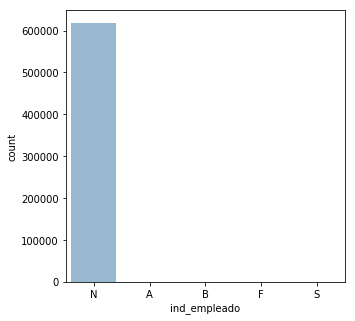

col : ind_empleado | date : 2015-02-28


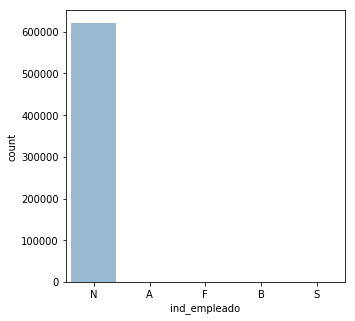

col : ind_empleado | date : 2015-03-28


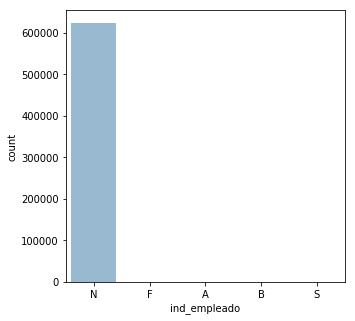

col : ind_empleado | date : 2015-04-28


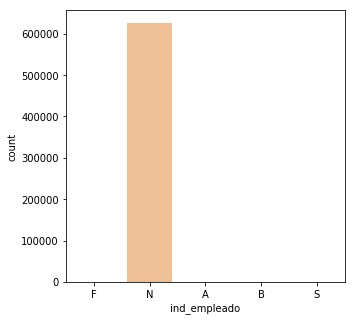

8 secs


In [8]:
st = time.time()

skip_cols = ['fecha_dato','ncodpers', 'renta']
for col in trn.columns[:3]:
    if col in skip_cols:
        continue
        
    print('='*50)
    
    for i, date in enumerate(dates):
        print('col : {} | date : {}'.format(col, date))
        f, ax = plt.subplots(figsize=(5, 5))
        sns.countplot(x=col, data=trn[trn['fecha_dato'] == date], alpha=0.5)
        plt.show()
    
        if i == 3:
            break
    break
    
print_time(time.time(),st)

In [ ]:
col = 'segmento'
print('='*50)
print('col : ', col)
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x=col, data=trn, alpha=0.5)
plt.show()

In [ ]:
trn.columns[24:]

In [ ]:
for col in trn.columns[24:]:
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd

# prepare for visualization

months = np.unique(trn['fecha_dato']).tolist()
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

In [ ]:
# plot stacked barplot of month vs labels
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

In [ ]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

In [ ]:
trn.shape

In [ ]:
trn.head()

# GET PURCHASE ONLY!
https://github.com/kweonwooj/kaggle_santander_product_recommendation/blob/master/bare_minimum/code/main.py#L36

In [ ]:
import pandas as pd
import numpy as np
import os


# iterate over train target cols, store the customer's last possession in dictionary, and ultimately
# get new purchase data.
def generate_labels():

    target_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                   'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                   'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                   'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                   'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                   'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

    # read train data line by line
    f = open('../data/train_ver2.csv', 'r', encoding='utf8')
    f.readline()

    # write labels.csv line by line
    if not os.path.isdir('../data'):
        os.mkdir('../data')
    g = open('../data/labels.csv', 'w')

    # write header
    out = ','.join(target_cols) + '\n'
    g.write(out)

    possession_log = dict()
    count = 0
    # iterate over train data
    while True:
        line = f.readline()[:-1]
        out = ""

        # break when all lines are read
        if line == '':
            break

        # split all values
        vals = line.split('"')
        vals = vals[0][:-1].split(',') + [vals[1]] + vals[2][1:].split(',')
        vals = [a.strip() for a in vals]

        # store current possession in labels
        possession = np.zeros(24).astype(int)
        for i, a in enumerate(vals[24:]):
            try:
                possession[i] = int(float(a))
            except:
                possession[i] = 0
        ncodper = vals[1]

        # extract new purchases only
        purchases = np.zeros(24).astype(int)
        if ncodper in possession_log:
            for i in range(24):
                if possession[i] == 1 and possession_log[ncodper][i] == 0:
                    purchases[i] = 1
        else:
            purchases = possession

        # store current possession of user in dictionary
        possession_log[ncodper] = possession

        for i in range(24):
            out += str(purchases[i]) + ','
        out = out[:-1] + '\n'
        g.write(out)

        count += 1

        if count % 1000000 == 0:
            print('# Processing {} lines..'.format(count))

    print('# Generated labels.csv..')
    # close file
    f.close()
    g.close()
    
generate_labels()

In [ ]:
labels.shape

In [ ]:
import pandas as pd

labels = pd.read_csv('../data/labels.csv').astype(int)
fecha_dato = pd.read_csv('../data/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

# prepare for visualization

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

In [ ]:
# plot stacked barplot of month vs labels
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

In [ ]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

In [ ]:
trn.shape, labels.shape